<div class="alert alert-block alert-info">
<center> <h1> DATA MINING MDSAA-BA </h1> </center> <br>
<center> PROJECT 2021/2022 </center>

**Table of Contents** <br>
* [1. Import](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Dataset](#importdataset)
* [2. Change Data Types](#changedatatypes)
* [3. Check for Incoherencies](#checkincoherencies)
* [4. Deal with Outliers](#outliers)
* [5. Treatment of Missing Values](#missingvalues)
* [6. Transform Variables](#transformvariables)

In [5]:
#    * [6.1. Categorical Variables - Histograms](#CatVarDist)
#    * [6.2. Numeric Variables - Histograms](#NumVarDist)
#    * [6.3. Numeric Variables - Boxplots](#NumVarBox)
#* [7. Coherence Checking](#Check)
#* [8. Transform Variables](#TransformVar)
#* [9. Coherence Checking - Age](#CheckAge)
#* [10. Outlier Removal](#outlier)
#    * [10.1. Outlier Removal - Defining Features](#outdefeatures)
#    * [10.2. Variables' Histograms](#hist)
#    * [10.3. Outlier Removal - Filtering](#outfiltering)
#         * [10.3.1. Filters 1 - Manual](#manual)
#         * [10.3.2. Filters 2 - IQR](#iqr)
#         * [10.3.3. Filters 3 - Manual & IQR](#manualiqr)

## Dúvidas 

<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [6]:
import pandas as pd
import math
import numpy as np
#! pip install plotly==5.4.0
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from patsy import dmatrices
import statsmodels.api as sm

<a class="anchor" id="importdataset">

## 1.2. Import Dataset

</a>

In [7]:
insur = pd.read_sas('a2z_insurance.sas7bdat', format='sas7bdat')

print(insur.shape)
insur.head()

(10296, 14)


CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
0     1.0        1985.0     1982.0  b'2 - High School'    2177.0         1.0   
1     2.0        1981.0     1995.0  b'2 - High School'     677.0         4.0   
2     3.0        1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
3     4.0        1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
4     5.0        1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   

   Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0       1.0      380.97        0.39     375.85          79.45      146.36   
1       1.0     -131.13        1.12      77.46         416.20      116.69   
2       0.0      504.67        0.28     206.15         224.50      124.58   
3       1.0      -16.99        0.99     182.48          43.35      311.17   
4       1.0       35.23        0.90     338.62          47.80      182.59   

   PremLife  PremWork  
0     47.01     16.89  
1    194.48    106.13  
2     86.35     99.02  
3     35.34     28.34  
4     18.78     41.45

<a class="anchor" id="changedatatypes">

## 2. Change Data Types

</a>

In [8]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [9]:
# ID does not make sense to be a float
insur.CustID = insur.CustID.astype('string') 
# Identify the education degree by only one number
insur.EducDeg = insur.EducDeg.astype('string').str[2]
# Transform GeoLivArea to a string
insur.GeoLivArea = insur.GeoLivArea.astype('string') 
# Transform Children to a string
insur.Children = insur.Children.astype('string') 

insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  string 
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  string 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  string 
 6   Children       10275 non-null  string 
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(10), string(4)
memory usage: 1.1 MB


<a class="anchor" id="checkincoherencies">

## 3. Check for Incoherencies

</a>

In [10]:
# Only makes sense to have FirstPolYear between 1916 and 2016
# Delete 1 line where FirstPolYear = 53784

insur = insur.loc[insur["FirstPolYear"] != 53784.0] 

In [11]:
# Only makes sense to have Birth Years between 1916 and 2016
# Delete 1 line where BirthYear = 1028

insur = insur.loc[insur["BirthYear"] != 1028] 

In [12]:
insur.apply(lambda x: 1 if x.FirstPolYear < x.BirthYear else 0, axis=1).value_counts()

0    8297
1    1997
dtype: int64

There are 1997 observations where FirstPolYear is bigger than BirthYear, meaning the policy would have been created before the birth of the person who owns it. 

Options for dealing with this incoherence:
- Eliminate de column(variable) BirthYear - meh
- Assume the correct value is the one of the policy and use this year for BirthYear - meh
- Replace the observations where this happens for NANs and inpute the value in the next stage(Missing Values) with knn - totil

In [13]:
insur['BirthYear'] = insur.apply(lambda x: None if x.FirstPolYear < x.BirthYear else x.BirthYear, axis=1)

insur.apply(lambda x: 1 if x.FirstPolYear < x.BirthYear else 0, axis=1).value_counts()

0    10294
dtype: int64

In [14]:
# Checking for incoherencies in the the Educ. Try to see if there are people with advanced qualifications who are too young
# to have them. None were ofund.

educ = insur.loc[((insur["EducDeg"] == '3') | (insur["EducDeg"] == '4')) & (insur["BirthYear"] >= 1995)] 
educ

# Aqui há incoerências !!

CustID  FirstPolYear  BirthYear EducDeg  MonthSal GeoLivArea Children  \
762    763.0        1996.0     1995.0       3    1258.0        1.0      1.0   
2560  2561.0        1996.0     1995.0       3    1227.0        4.0      1.0   
6482  6483.0        1997.0     1996.0       3    1382.0        1.0      1.0   
8052  8053.0        1995.0     1995.0       3     389.0        2.0      1.0   
8188  8189.0        1996.0     1995.0       3     779.0        1.0      1.0   
8348  8349.0        1996.0     1995.0       3    1194.0        3.0      0.0   
8613  8614.0        1995.0     1995.0       3     778.0        4.0      1.0   
8898  8899.0        1995.0     1995.0       3    1055.0        2.0      0.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
762       383.73        0.58     197.15         482.30      146.25     73.57   
2560      347.85        0.51     316.17         225.05      159.14     34.23   
6482      -54.67        1.03      89.24         587.90      228.82    118.91   
8052      -25.00        1.00      95.13         609.00      171.81     43.12   
8188     1071.77        0.26      43.01        1148.00      107.91     94.24   
8348      551.44        0.39     124.69         451.75      288.61     50.01   
8613       93.69        0.87      57.01         398.40      305.17    113.91   
8898      320.74        0.59     224.71         342.85      220.93      2.89   

      PremWork  
762      85.57  
2560     22.45  
6482     11.56  
8052    146.14  
8188     90.24  
8348     29.23  
8613     52.23  
8898     55.90

In [15]:
def sum_prems(*args):
    total_prem = 0
    for prem in args:
        total_prem += prem
    return total_prem

# Create new column with 0's and 1's
insur['Coherence_Premiums'] = insur.apply(lambda x:1 if (sum_prems(x.PremMotor, x.PremHousehold, x.PremLife, x.PremHealth, x.PremWork) > (x.MonthSal*12)) else 0, axis=1)

# Check whcih observations are incoherencies
premium = insur.loc[insur["Coherence_Premiums"] == 1, ]  # 1 observation
display(premium)

CustID  FirstPolYear  BirthYear EducDeg  MonthSal GeoLivArea Children  \
9149  9150.0        1985.0        NaN       2     987.0        3.0      1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
9149      804.05        0.97      26.34         829.05     28272.0     65.68   

      PremWork  Coherence_Premiums  
9149    138.25                   1

In [16]:
# Remove those observations from the insur dataset
insur = insur.loc[insur['CustID'] != '9150.0']
# Remove column created above
insur.drop('Coherence_Premiums', axis=1, inplace=True)

In [17]:
#checking if there is any case where the client has not spent any amount in premiums
insur.apply(lambda x:1 if sum_prems(x.PremMotor, x.PremHousehold, x.PremLife, x.PremHealth, x.PremWork) == 0 else 0, axis=1).value_counts()

0    10293
dtype: int64

Removed so far
- 1 birthyear
- 1 first polyear
- 1 premiums

<a class="anchor" id="outliers">

## 4. Deal with Outliers

</a>

In [18]:
before_outliers = insur.shape[0]

### Pair Grid before Outlier Removal 

In [19]:
#grid = sns.PairGrid(data= insur, vars = ['MonthSal', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', \
#                                        'PremHealth', 'PremLife', 'PremWork'], height = 4)
#grid = grid.map_upper(plt.scatter, color = 'darkseagreen')
#grid = grid.map_diag(plt.hist, bins = 10, color = 'cadetblue')
#grid = grid.map_lower(plt.scatter, color = 'darkseagreen')

### MonthSal

In [20]:
fig = px.histogram(insur, x=insur.MonthSal, color_discrete_sequence=['darkseagreen'], template='plotly_white', \
                   width=950, height=400)
fig.show()

fig = px.box(insur, y=insur.MonthSal, color_discrete_sequence=['dimgrey'], template='plotly_white', \
             width=400, height=400)
fig.show()

In [21]:
insur = insur.loc[(insur["MonthSal"] != 34490.0) & (insur["MonthSal"] != 55215.0)] # Delete 2 lines

### CustMonVal

In [22]:
fig = px.histogram(insur, x=insur.CustMonVal, color_discrete_sequence=['darkseagreen'], template='plotly_white', \
                   width=950, height=400)
fig.show()

fig = px.box(insur, y=insur.CustMonVal, color_discrete_sequence=['dimgrey'], template='plotly_white', \
                   width=400, height=400)
fig.show()

In [23]:
insur = insur.loc[(insur["CustMonVal"] >= -416.73) & (insur["CustMonVal"] <= 1254.46)] # Delete 42 lines

### ClaimsRate

In [24]:
fig = px.histogram(insur, x=insur.ClaimsRate, color_discrete_sequence=['darkseagreen'], template='plotly_white',  \
                   width=950, height=400)
fig.show()

fig = px.box(insur, y=insur.ClaimsRate, color_discrete_sequence=['dimgrey'], template='plotly_white',  \
                   width=400, height=400)
fig.show()

In [25]:
insur = insur.loc[insur["ClaimsRate"] <= 1.62] # Delete 1 line

### PremMotor

In [26]:
fig = px.histogram(insur, x=insur.PremMotor, color_discrete_sequence=['darkseagreen'], template='plotly_white',  \
                   width=950, height=400)
fig.show()

fig = px.box(insur, y=insur.PremMotor, color_discrete_sequence=['dimgrey'], template='plotly_white',  \
                   width=400, height=400)
fig.show()

In [27]:
insur = insur.loc[(insur["PremMotor"] != -4.11) & (insur["PremMotor"] != 3106.62) & (insur["PremMotor"] != 4003.44) & (insur["PremMotor"] != 8744.61)] # Delete 4 lines


### PremHousehold

In [28]:
fig = px.histogram(insur, x=insur.PremHousehold, color_discrete_sequence=['darkseagreen'], template='plotly_white',  \
                   width=950, height=400)
fig.show()

fig = px.box(insur, y=insur.PremHousehold, color_discrete_sequence=['dimgrey'], template='plotly_white',  \
                   width=400, height=400)
fig.show()

In [29]:
insur = insur.loc[insur["PremHousehold"] <= 1286.9] # Delete 20 lines

### PremHealth

In [30]:
fig = px.histogram(insur, x=insur.PremHealth, color_discrete_sequence=['darkseagreen'], template='plotly_white',  \
                   width=950, height=400)
fig.show()

fig = px.box(insur, y=insur.PremHealth, color_discrete_sequence=['dimgrey'], template='plotly_white',  \
                   width=400, height=400)
fig.show()

In [31]:
insur = insur.loc[(insur["PremHealth"] != -2.11) & (insur["PremHealth"] != 7322.48) & (insur["PremHealth"] != 28272.0)] # Delete 3 lines

### PremLife

In [32]:
fig = px.histogram(insur, x=insur.PremLife, color_discrete_sequence=['darkseagreen'], template='plotly_white',  \
                   width=950, height=400)
fig.show()

fig = px.box(insur, y=insur.PremLife, color_discrete_sequence=['dimgrey'], template='plotly_white',  \
                   width=400, height=400)
fig.show()

In [33]:
# Tirar só oultiers e não os missing values

#insur = insur.loc[(insur["PremLife"] != 398.3) & (insur["PremLife"] != 7322.48) & (insur["PremLife"] != 28272.0)] # Delete 3 lines

### PremWork

In [34]:
fig = px.histogram(insur, x=insur.PremWork, color_discrete_sequence=['darkseagreen'], template='plotly_white',  \
                   width=950, height=400)
fig.show()

fig = px.box(insur, y=insur.PremWork, color_discrete_sequence=['dimgrey'], template='plotly_white',  \
                   width=400, height=400)
fig.show()

In [35]:
insur = insur.loc[(insur["PremWork"] != 417.08) & (insur["PremWork"] != 451.53) & (insur["PremWork"] != 494.1)] # Delete 3 lines

In [36]:
# See descriptive statistics for all the variables after the remobal of outliers
insur.describe().T

count         mean         std      min        25%       50%  \
FirstPolYear   10189.0  1986.018746    6.604952  1974.00  1980.0000  1986.000   
BirthYear       8249.0  1962.655595   14.665981  1935.00  1951.0000  1962.000   
MonthSal       10183.0  2504.017677  981.597555   333.00  1716.0000  2506.000   
CustMonVal     10219.0   215.506765  250.679708  -416.73    -9.2200   186.710   
ClaimsRate     10219.0     0.680776    0.317954     0.00     0.3900     0.720   
PremMotor      10186.0   298.018829  137.338996     1.78   192.5075   299.335   
PremHousehold  10219.0   201.997818  222.853572   -75.00    49.4500   132.800   
PremHealth     10177.0   168.273279   74.094396     5.78   112.0200   162.920   
PremLife       10115.0    41.670100   47.238692    -7.00     9.8900    25.560   
PremWork       10133.0    40.712453   46.215567   -12.00    10.6700    25.670   

                   75%      max  
FirstPolYear   1992.00  1998.00  
BirthYear      1974.00  1997.00  
MonthSal       3293.00  5021.00  
CustMonVal      398.08  1254.46  
ClaimsRate        0.98     1.62  
PremMotor       408.30   585.22  
PremHousehold   285.60  1286.90  
PremHealth      219.82   442.86  
PremLife         57.79   398.30  
PremWork         56.01   353.18

In [43]:
#for i in insur.PremWork.sort_values():
#    print(i)

In [44]:
after_outliers = insur.shape[0]
perc = round(((before_outliers - after_outliers) / before_outliers)*100, 3)
print(f'By removing the outliers, we deleted {perc}% of our data set ({before_outliers - after_outliers} observations).')

By removing the outliers, we deleted 0.719% of our data set (74 observations).


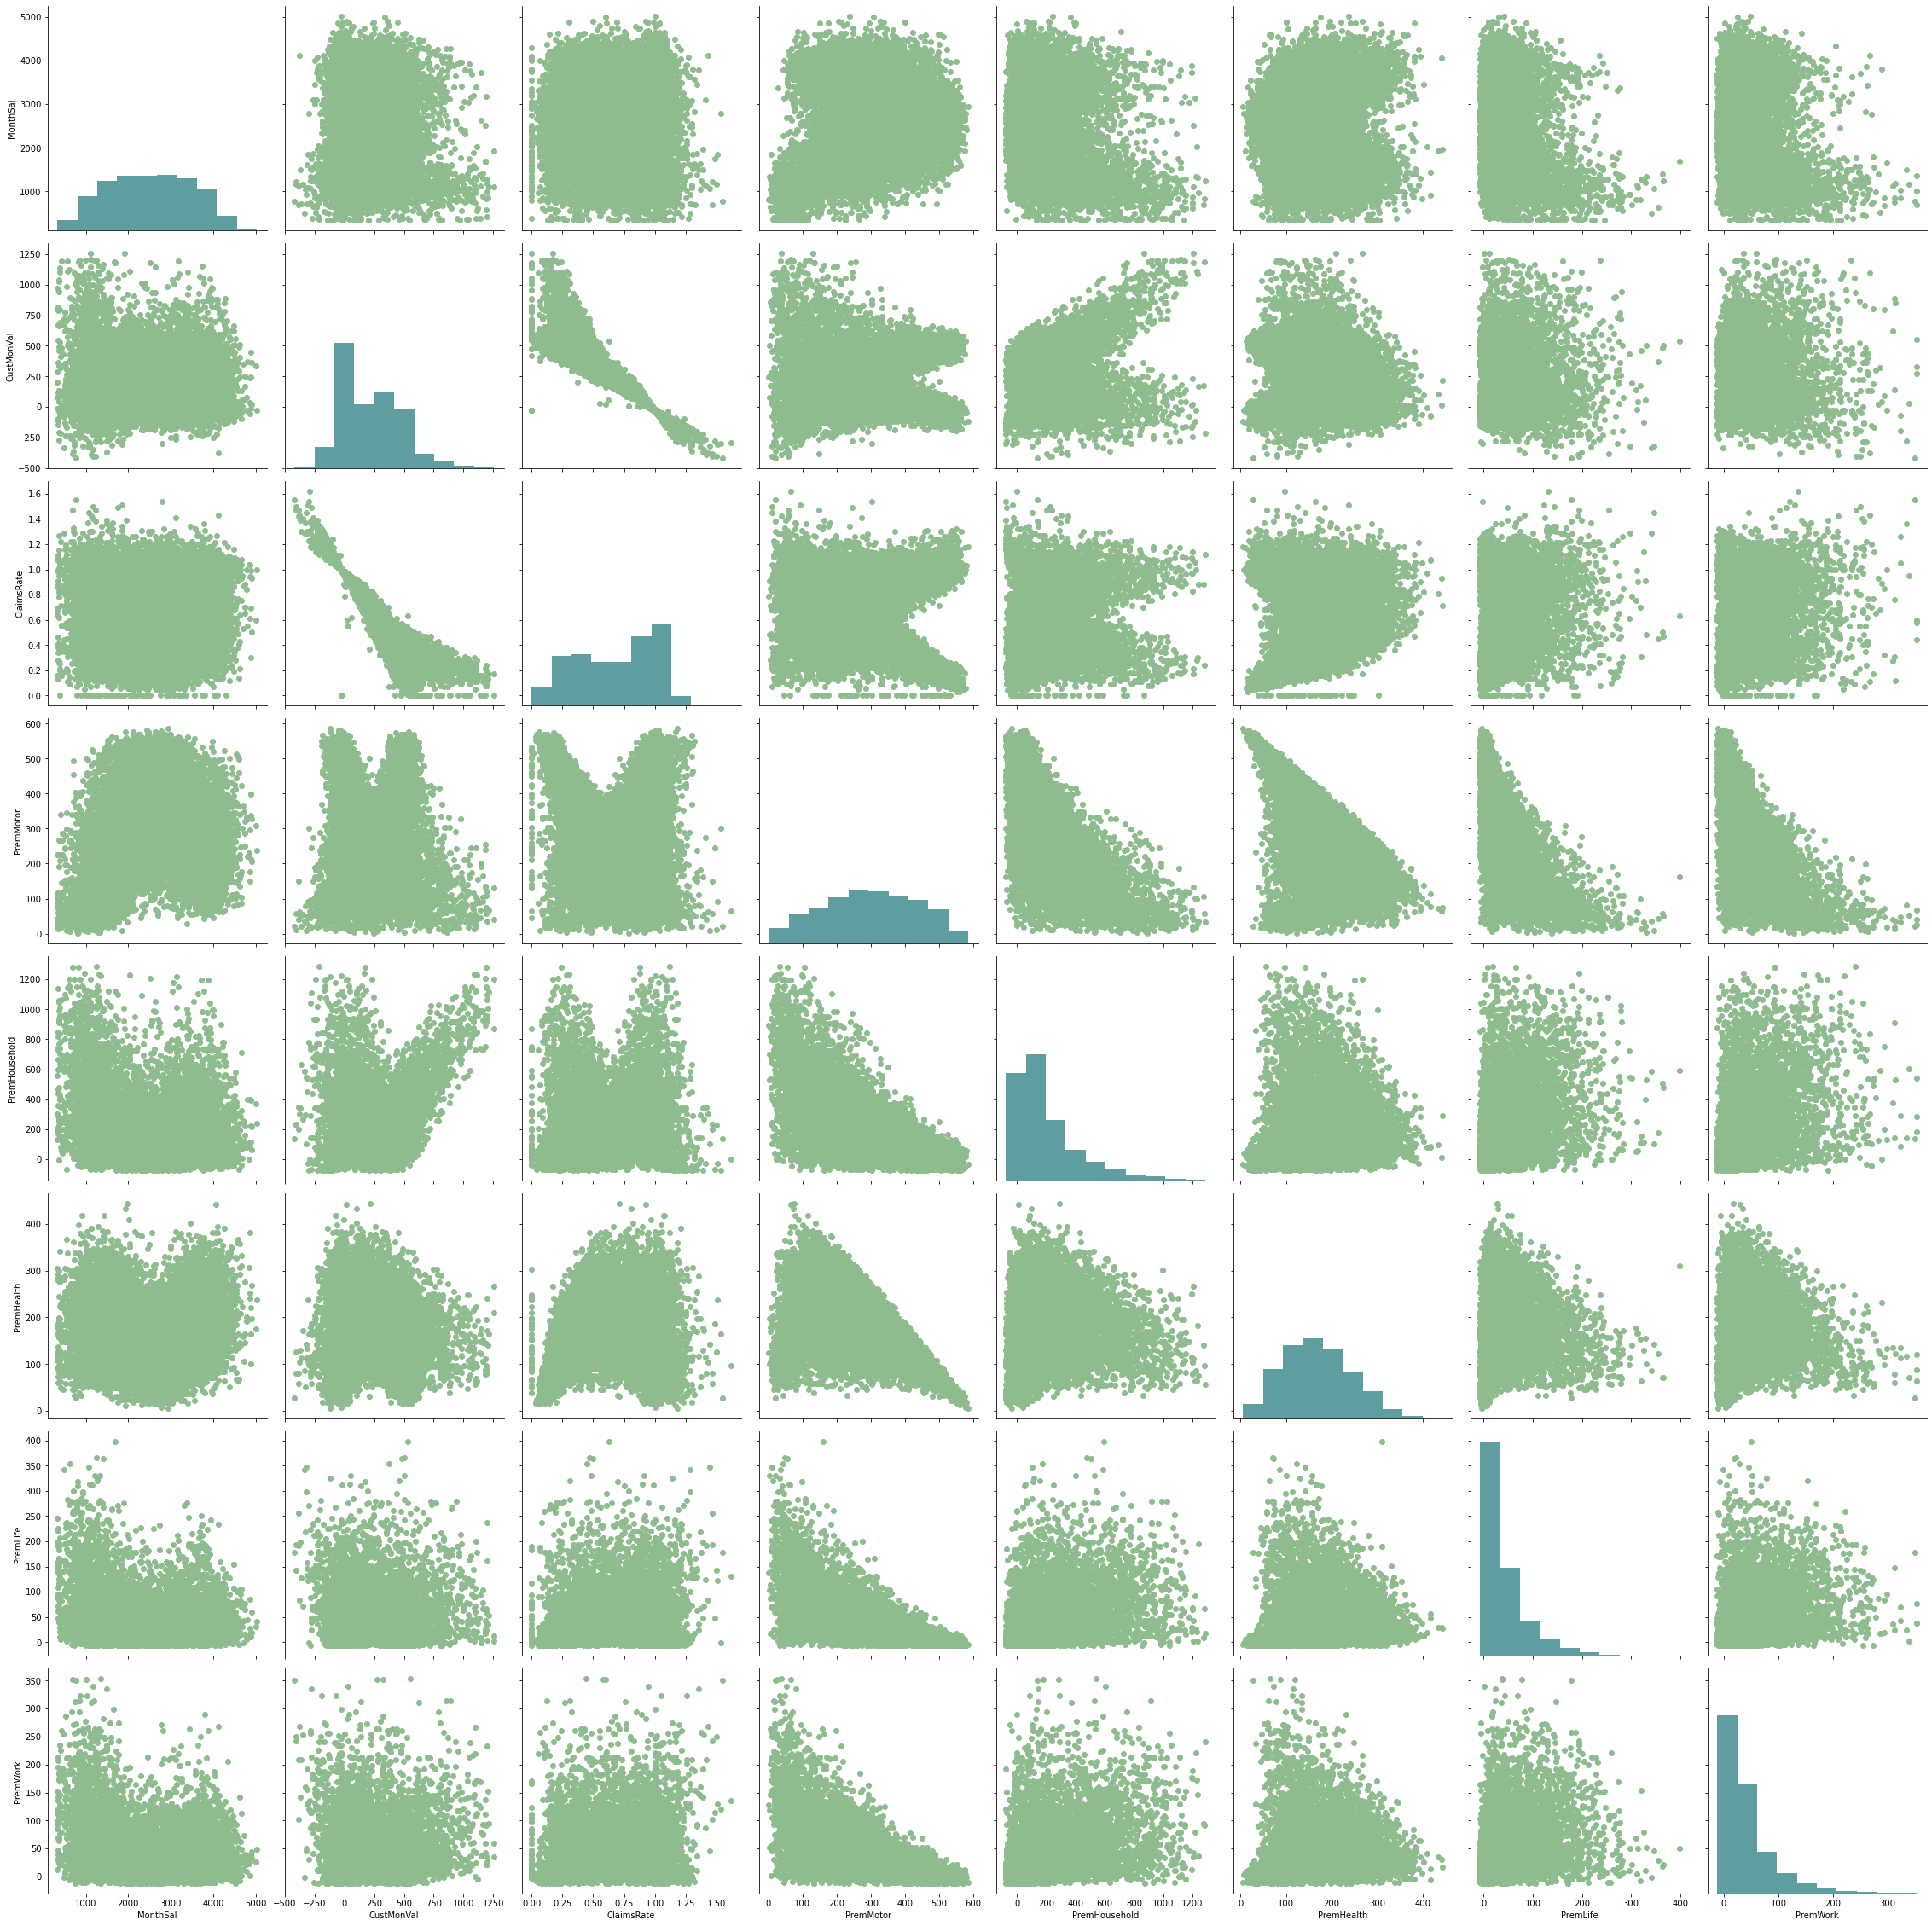

In [39]:
grid = sns.PairGrid(data= insur, vars = ['MonthSal', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth', \
                                         'PremLife', 'PremWork'], height = 4)
grid = grid.map_upper(plt.scatter, color = 'darkseagreen')
grid = grid.map_diag(plt.hist, bins = 10, color = 'cadetblue')
grid = grid.map_lower(plt.scatter, color = 'darkseagreen')

In [40]:
#DEFINE METRIC AND NON METRIC FEATURES
metric_features = insur.select_dtypes(include=np.number).set_index(insur.index).columns.to_list()
non_metric_features = insur.select_dtypes(exclude=np.number).set_index(insur.index).columns.to_list()

<a class="anchor" id="missingvalues">

## 5. Treatment of Missing Values

</a>

In [41]:
insur.EducDeg = pd.to_numeric(insur.EducDeg)
insur.GeoLivArea = insur.GeoLivArea.astype('float64') 
insur.Children = insur.Children.astype('float64') 

insur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10219 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10219 non-null  string 
 1   FirstPolYear   10189 non-null  float64
 2   BirthYear      8249 non-null   float64
 3   EducDeg        10202 non-null  float64
 4   MonthSal       10183 non-null  float64
 5   GeoLivArea     10218 non-null  float64
 6   Children       10198 non-null  float64
 7   CustMonVal     10219 non-null  float64
 8   ClaimsRate     10219 non-null  float64
 9   PremMotor      10186 non-null  float64
 10  PremHousehold  10219 non-null  float64
 11  PremHealth     10177 non-null  float64
 12  PremLife       10115 non-null  float64
 13  PremWork       10133 non-null  float64
dtypes: float64(13), string(1)
memory usage: 1.4 MB


In [42]:
insur.isna().sum()

CustID              0
FirstPolYear       30
BirthYear        1970
EducDeg            17
MonthSal           36
GeoLivArea          1
Children           21
CustMonVal          0
ClaimsRate          0
PremMotor          33
PremHousehold       0
PremHealth         42
PremLife          104
PremWork           86
dtype: int64

In [37]:
#STRATEGIES TO APPLY

#FirstPolYear      30 ------> simply remove, it is probably an error!!
#GeoLivArea         1 -------> simply remove, it is only one observation!!
#PremMotor         34 ------> replace with zero, meaning that they did not spent anything in that premium!!
#PremHealth        43 ------> replace with zero, meaning that they did not spent anything in that premium!!
#PremLife         104 ------> replace with zero, meaning that they did not spent anything in that premium!!
#PremWork          86 ------> replace with zero, meaning that they did not spent anything in that premium!!


#BirthYear         1970 (instead of initial 17) 
#EducDeg           17 
#MonthSal          36 
#Children          21 

### Remove missing values from FirstPolYear, GeoLivArea and Prem Variables

In [46]:
# Remove missing values from FirstPolYear
insur.dropna(subset=['FirstPolYear'], inplace=True)  # 30 rows dropped

# Remove missing values from GeoLivArea
insur.dropna(subset = ['GeoLivArea'], inplace = True) # 1 row dropped

# Remove missing values from Prem variables
insur['PremMotor'].fillna(0, inplace = True)
insur['PremHealth'].fillna(0, inplace = True)
insur['PremLife'].fillna(0, inplace = True)
insur['PremWork'].fillna(0, inplace = True)

In [47]:
insur.isna().sum()

CustID              0
FirstPolYear        0
BirthYear        1967
EducDeg             2
MonthSal           34
GeoLivArea          0
Children           13
CustMonVal          0
ClaimsRate          0
PremMotor           0
PremHousehold       0
PremHealth          0
PremLife            0
PremWork            0
dtype: int64

In [48]:
#EducDeg           2 ----->  nearest neighbours
#MonthSal          34 ----->  nearest neighbours
#Children          13 ----->  nearest neighbours

#BirthYear         1967 (instead of initial 17) ----->  nearest neighbours

### Remove missing values from EducDeg

In [49]:
# Use this regression to see which variables afect each variable
y,x = dmatrices('EducDeg ~ FirstPolYear + MonthSal + GeoLivArea + CustMonVal + ClaimsRate + PremMotor + PremHousehold + PremHealth + PremLife + PremWork', 
                data = insur, NA_action='drop', return_type='dataframe')
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                EducDeg   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     427.1
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:25:26   Log-Likelihood:                -10256.
No. Observations:               10154   AIC:                         2.053e+04
Df Residuals:                   10143   BIC:                         2.061e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3254      1.990      1.168

In [50]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


# Impute the missing values in EducDeg
missing_EducDeg = insur.loc[insur.EducDeg.isnull()]
#missing_EducDeg
complete = insur.loc[~insur.EducDeg.isnull()]
#complete


# We can change these parameters !!!
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')


# Fit our model to X and y (without missing values)
knn_fitted = knn.fit(complete.loc[ : , ['PremMotor','PremHealth','PremHousehold','PremLife','PremWork']], complete.loc[ : , 'EducDeg'])

# Imput the missing values in EducDeg
imputed_values = knn_fitted.predict(missing_EducDeg.loc[ : , ['PremMotor','PremHealth','PremHousehold','PremLife','PremWork']])

missing_EducDeg = missing_EducDeg.drop(columns='EducDeg')
missing_EducDeg.insert(3, 'EducDeg', imputed_values)
imputed_EducDeg = missing_EducDeg
display(imputed_EducDeg) # Show imputed observations

# Drop the nulls values in EducDeg
insur.dropna(subset = ['EducDeg'], inplace = True) # 2 rows dropped

# Concate the observations that had nulls and were imputed
insur = insur.append(imputed_EducDeg) # 2 rows added

CustID  FirstPolYear  BirthYear  EducDeg  MonthSal  GeoLivArea  \
1707  1708.0        1992.0     1946.0      2.0    3827.0         4.0   
6560  6561.0        1976.0        NaN      1.0       NaN         4.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
1707       0.0      355.52        0.33     222.71          146.7         0.0   
6560       1.0       85.91        0.77      91.24            0.0       227.6   

      PremLife  PremWork  
1707     94.13    105.24  
6560     60.01    110.91

In [51]:
insur.isna().sum()

CustID              0
FirstPolYear        0
BirthYear        1967
EducDeg             0
MonthSal           34
GeoLivArea          0
Children           13
CustMonVal          0
ClaimsRate          0
PremMotor           0
PremHousehold       0
PremHealth          0
PremLife            0
PremWork            0
dtype: int64

### Remove missing values from MonthSal

In [52]:
# Impute the missing values in MonthSal

y,x = dmatrices('MonthSal ~ FirstPolYear + Children + GeoLivArea + EducDeg + CustMonVal + ClaimsRate + PremHealth + PremMotor + PremHousehold + PremLife + PremWork', data = insur, NA_action='drop', return_type='dataframe')
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())
# dá 36% de variância explicada

                            OLS Regression Results                            
Dep. Variable:               MonthSal   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     509.6
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:25:37   Log-Likelihood:                -82030.
No. Observations:               10142   AIC:                         1.641e+05
Df Residuals:                   10130   BIC:                         1.642e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2974.0261   2361.984     -1.259

In [53]:
#criar tabela com as observacoes onde MonthSal é null
missing_MonthSal = insur[insur['MonthSal'].isna()]

#criar outra tabela com as observaçoes inversas
complete = insur[~insur.index.isin(missing_MonthSal.index)]
#retirar observaçoes onde children é null
complete = complete.loc[complete.Children.notnull()]


#criar o regressor - podemos alterar isto !!!
regressor = KNeighborsRegressor(10, weights='distance', metric='euclidean')


#treinar os dados
regressor_fitted = regressor.fit(complete.loc[:, ['FirstPolYear', 'Children', 'EducDeg', 'PremHousehold', 'PremMotor', 'PremLife', 'PremWork']], complete.loc[:,['MonthSal']])

#criar array com os valores previstos
imputed_values = regressor_fitted.predict(missing_MonthSal.loc[:, ['FirstPolYear', 'Children', 'EducDeg', 'PremHousehold', 'PremMotor', 'PremLife', 'PremWork']])

missing_MonthSal = missing_MonthSal.drop(columns=['MonthSal'])
missing_MonthSal.insert(4, 'MonthSal', imputed_values)
imputed_MonthSal = missing_MonthSal
display(imputed_MonthSal) # Show imputed observations

#remover do dataframe original todas as observaçoes onde MonthSal é null
insur = insur.loc[insur['MonthSal'].notnull()]

insur = pd.concat([insur, imputed_MonthSal])

CustID  FirstPolYear  BirthYear  EducDeg     MonthSal  GeoLivArea  \
21      22.0        1977.0     1958.0      2.0  3036.000000         3.0   
143    144.0        1996.0     1990.0      3.0   978.000000         4.0   
488    489.0        1977.0     1947.0      3.0  2404.227298         3.0   
539    540.0        1979.0        NaN      2.0  2298.896045         2.0   
830    831.0        1988.0     1942.0      2.0  2571.960883         4.0   
1160  1161.0        1981.0        NaN      3.0  2384.622436         3.0   
1780  1781.0        1998.0     1964.0      3.0  2547.684570         1.0   
1816  1817.0        1978.0     1959.0      3.0  2680.751171         2.0   
1851  1852.0        1976.0     1953.0      3.0  2710.000000         4.0   
1872  1873.0        1978.0     1963.0      2.0  2749.000000         2.0   
2241  2242.0        1988.0     1964.0      3.0  2917.000000         1.0   
3227  3228.0        1990.0     1949.0      4.0  3413.601025         1.0   
3317  3318.0        1980.0     1943.0      2.0  2827.764286         2.0   
3477  3478.0        1993.0     1939.0      1.0  3776.000000         3.0   
3720  3721.0        1976.0        NaN      3.0  2533.000000         4.0   
3972  3973.0        1988.0     1979.0      2.0  3219.188785         4.0   
4625  4626.0        1978.0        NaN      3.0  2497.456758         4.0   
4847  4848.0        1989.0     1987.0      3.0  1643.000000         1.0   
5082  5083.0        1986.0     1953.0      2.0  2453.675767         4.0   
5396  5397.0        1977.0        NaN      3.0  2943.005951         4.0   
5538  5539.0        1983.0        NaN      3.0  2678.685914         3.0   
5574  5575.0        1995.0     1972.0      3.0  2659.000000         3.0   
5850  5851.0        1989.0        NaN      1.0  1356.000000         3.0   
6461  6462.0        1976.0        NaN      3.0  2226.959383         4.0   
7371  7372.0        1977.0     1952.0      3.0  3422.000000         4.0   
7453  7454.0        1974.0     1944.0      1.0  3149.000000         1.0   
7892  7893.0        1986.0        NaN      3.0  2785.193097         2.0   
8676  8677.0        1979.0        NaN      1.0  2196.981895         4.0   
8677  8678.0        1988.0     1944.0      1.0  3237.088760         1.0   
9276  9277.0        1983.0     1947.0      3.0  3343.061905         4.0   
9821  9822.0        1978.0        NaN      3.0  2657.001919         3.0   
9904  9905.0        1984.0     1960.0      3.0  2975.000000         4.0   
9960  9961.0        1994.0     1989.0      2.0  3133.163195         1.0   
6560  6561.0        1976.0        NaN      1.0  2883.921927         4.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
21         1.0      111.37        0.80     407.52         111.70      100.13   
143        1.0      -42.45        1.02     146.36         353.95      220.04   
488        0.0      -52.56        1.09       0.00           0.00      278.83   
539        1.0       85.13        0.79     156.25           0.00      237.71   
830        0.0      475.43        0.00     274.83           0.00      180.59   
1160       1.0        4.56        0.79       0.00           0.00      106.02   
1780       1.0      454.43        0.16     509.43           0.00       66.90   
1816       1.0       58.68        0.62       0.00           0.00      138.47   
1851       1.0       14.45        0.95     366.29         300.60      134.36   
1872       1.0      -12.33        0.98     269.94         206.70      225.71   
2241       1.0      517.65        0.14     502.54          50.00       76.57   
3227       0.0        8.12        0.87     225.60           0.00        0.00   
3317       0.0      -38.56        1.02     363.29           0.00      154.14   
3477       0.0      150.81        0.74     175.81         108.35      261.27   
3720       1.0      487.20        0.23     437.86          79.45      142.47   
3972       1.0      207.60        0.51     252.27           0.00      134.58   
4625       1.0      

In [55]:
insur.isna().sum()

CustID              0
FirstPolYear        0
BirthYear        1967
EducDeg             0
MonthSal            0
GeoLivArea          0
Children           13
CustMonVal          0
ClaimsRate          0
PremMotor           0
PremHousehold       0
PremHealth          0
PremLife            0
PremWork            0
dtype: int64

### Remove missing values from Children

In [56]:
# Impute the missing values in Children

y,x = dmatrices('Children ~ FirstPolYear + EducDeg + MonthSal + GeoLivArea + CustMonVal + ClaimsRate + PremMotor + PremHousehold + PremHealth + PremLife + PremWork', 
                data = insur, NA_action='drop', return_type='dataframe')
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())
# dá 36% de variância explicada

                            OLS Regression Results                            
Dep. Variable:               Children   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     503.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:25:53   Log-Likelihood:                -4213.6
No. Observations:               10176   AIC:                             8451.
Df Residuals:                   10164   BIC:                             8538.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7604      1.095      0.694

In [57]:
missing_Children = insur.loc[insur.Children.isnull()]
#missing_Children
complete = insur.loc[~insur.Children.isnull()]
#complete



# We can change these parameters - podemos mudar isto !!!
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')



# Fit our model to X and y (without missing values)
knn_fitted = knn.fit(complete.loc[ : , ['EducDeg', 'MonthSal', 'GeoLivArea', 'PremMotor','PremHealth','PremHousehold','PremLife','PremWork']], complete.loc[ : , 'Children'])

# Imput the missing values in EducDeg
imputed_values = knn_fitted.predict(missing_Children.loc[ : , ['EducDeg', 'MonthSal', 'GeoLivArea', 'PremMotor','PremHealth','PremHousehold','PremLife','PremWork']])

missing_Children = missing_Children.drop(columns='Children')
missing_Children.insert(6, 'Children', imputed_values)
imputed_Children = missing_Children
display(imputed_Children) # show imputed observations

#drop the nulls values in EducDeg
insur.dropna(subset = ['Children'], inplace = True) # 2 rows dropped

#concate the observations that had nulls and were imputed
insur = insur.append(imputed_Children) # 2 rows added

CustID  FirstPolYear  BirthYear  EducDeg  MonthSal  GeoLivArea  \
619    620.0        1980.0        NaN      3.0    1333.0         2.0   
772    773.0        1998.0     1949.0      2.0    3601.0         2.0   
2362  2363.0        1981.0     1975.0      2.0    1607.0         2.0   
2671  2672.0        1992.0     1988.0      2.0    1140.0         2.0   
3177  3178.0        1980.0     1975.0      3.0    2647.0         2.0   
3280  3281.0        1980.0     1949.0      2.0    3509.0         2.0   
3684  3685.0        1992.0     1959.0      1.0    3086.0         2.0   
4728  4729.0        1979.0     1964.0      1.0    2740.0         2.0   
5437  5438.0        1976.0        NaN      3.0    1817.0         2.0   
6471  6472.0        1988.0     1952.0      2.0    3228.0         2.0   
8018  8019.0        1982.0     1963.0      3.0    2699.0         2.0   
8374  8375.0        1993.0        NaN      1.0     924.0         2.0   
8419  8420.0        1976.0     1966.0      3.0    2884.0         2.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
619        1.0      312.52        0.40     286.83          -6.10      175.70   
772        0.0       27.01        0.94     104.91         308.95      285.61   
2362       1.0      271.51        0.64     292.61         308.40      159.14   
2671       1.0      356.40        0.54     168.03         265.60      273.94   
3177       1.0      392.19        0.37     404.41         107.25      110.80   
3280       0.0      253.61        0.59     170.70         161.15      229.60   
3684       0.0      -92.68        1.09     367.07         147.80      124.80   
4728       1.0      -27.89        1.00     480.20          88.35       83.35   
5437       1.0      -37.00        1.02     372.85         186.70      146.25   
6471       0.0      294.95        0.62     319.95         328.95      131.47   
8018       1.0      434.66        0.16     509.54         -25.55       72.68   
8374       1.0     -245.93        1.20      58.01         612.90      190.48   
8419       1.0      533.10        0.08     529.10          25.00       50.01   

      PremLife  PremWork  
619      52.90     56.79  
772      64.90     52.90  
2362     11.89     59.68  
2671     68.79     52.23  
3177     24.56     12.78  
3280      5.78    113.69  
3684      9.78     67.68  
4728      5.89      2.89  
5437     13.78      1.78  
6471     62.90      6.78  
8018     -1.11     -7.00  
8374     45.23    175.70  
8419     -1.00      5.00

In [58]:
insur.isna().sum()

CustID              0
FirstPolYear        0
BirthYear        1967
EducDeg             0
MonthSal            0
GeoLivArea          0
Children            0
CustMonVal          0
ClaimsRate          0
PremMotor           0
PremHousehold       0
PremHealth          0
PremLife            0
PremWork            0
dtype: int64

### Remove missing values from BirthYear

In [61]:
# Impute the missing values in BirthYear

y,x = dmatrices('BirthYear ~ FirstPolYear + EducDeg + MonthSal + GeoLivArea + Children + CustMonVal + ClaimsRate + PremMotor + PremHousehold + PremHealth + PremLife + PremWork', 
                data = insur, NA_action='drop', return_type='dataframe')
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              BirthYear   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     5154.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:26:24   Log-Likelihood:                -32377.
No. Observations:               10189   AIC:                         6.478e+04
Df Residuals:                   10176   BIC:                         6.487e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1667.4139     17.352     96.094

In [62]:
missing_BirthYear = insur.loc[insur.BirthYear.isnull()]
#missing_BirthYear
complete = insur.loc[~insur.BirthYear.isnull()]
#complete



# We can change these parameters
clf = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')



# Fit our model to X and y (without missing values)
trained_model = clf.fit(complete.loc[ : , ['FirstPolYear','MonthSal', 'Children']], complete.loc[ : , 'BirthYear'])

# Imput the missing values in EducDeg
imputed_values = trained_model.predict(missing_BirthYear.loc[ : , ['FirstPolYear','MonthSal', 'Children']])

missing_BirthYear = missing_BirthYear.drop(columns='BirthYear')
missing_BirthYear.insert(2, 'BirthYear', imputed_values)
imputed_BirthYear = missing_BirthYear
display(imputed_BirthYear) # show imputed observations

#drop the nulls values in EducDeg
insur.dropna(subset = ['BirthYear'], inplace = True) # 1967 rows dropped

#concate the observations that had nulls and were imputed
insur = insur.append(imputed_BirthYear, sort=True) 

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

In [63]:
insur.apply(lambda x: 1 if x.FirstPolYear < x.BirthYear else 0, axis=1).value_counts()

0    9411
1     778
dtype: int64

In [64]:
insur.isna().sum()

BirthYear        0
Children         0
ClaimsRate       0
CustID           0
CustMonVal       0
EducDeg          0
FirstPolYear     0
GeoLivArea       0
MonthSal         0
PremHealth       0
PremHousehold    0
PremLife         0
PremMotor        0
PremWork         0
dtype: int64

In [65]:
#REMOVE CUSTID FROM THE DATASET
insur.drop('BirthYear', axis = 1, inplace= True)

In [66]:
#REMOVE CUSTID FROM THE DATASET
insur.drop('CustID', axis = 1, inplace= True)

In [67]:
insur.head()

Children  ClaimsRate  CustMonVal  EducDeg  FirstPolYear  GeoLivArea  \
0       1.0        0.39      380.97      2.0        1985.0         1.0   
2       0.0        0.28      504.67      1.0        1991.0         3.0   
3       1.0        0.99      -16.99      3.0        1990.0         4.0   
4       1.0        0.90       35.23      3.0        1986.0         4.0   
5       1.0        1.00      -24.33      2.0        1986.0         4.0   

   MonthSal  PremHealth  PremHousehold  PremLife  PremMotor  PremWork  
0    2177.0      146.36          79.45     47.01     375.85     16.89  
2    2277.0      124.58         224.50     86.35     206.15     99.02  
3    1099.0      311.17          43.35     35.34     182.48     28.34  
4    1763.0      182.59          47.80     18.78     338.62     41.45  
5    2566.0      114.80          18.90      7.00     440.75      7.67

<a class="anchor" id="transformvariables">

## 6. Transform Variables

</a>

In [71]:
# Usar isto para pormos as colunas novas num sítio que dê jeito para visualizar

#insur.insert(indice, nome_coluna, valores)  

In [72]:
#Number of year since the client has been involved with the company
#insur.insert(5, 'Client_Recency', 2016 - insur['FirstPolYear'])

In [73]:
insur['Client_Recency'] = 2016 - insur['FirstPolYear']

#Total amount spent in premiums 
insur['Total_Premiums'] = insur.loc[:,['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']].sum(1)
 
#Annual Salary of the client
insur['Annual_Salary'] = 12 * insur['MonthSal']

#Weight of the expenditure in Premiums on the total Annual Salary
insur['Salary_Ratio'] = insur['Total_Premiums']/insur['Annual_Salary']

#Weight of the expenditure in Motor Premiums on the Total Premiums 
insur['PremMotor_Ratio'] = insur['PremMotor']/insur['Total_Premiums']
insur['PremMotor_Ratio'] = insur['PremMotor_Ratio'].where(insur['PremMotor_Ratio']>0, 0)

#Weight of the expenditure in Household Premiums on the Total Premiums 
insur['PremHousehold_Ratio'] = insur['PremHousehold']/insur['Total_Premiums']
insur['PremHousehold_Ratio'] = insur['PremHousehold_Ratio'].where(insur['PremHousehold_Ratio']>0, 0)

#Weight of the expenditure in Health Premiums on the Total Premiums 
insur['PremHealth_Ratio'] = insur['PremHealth']/insur['Total_Premiums']
insur['PremHealth_Ratio'] = insur['PremHealth_Ratio'].where(insur['PremHealth_Ratio']>0, 0)

#Weight of the expenditure in Life Premiums on the Total Premiums 
insur['PremLife_Ratio'] = insur['PremLife']/insur['Total_Premiums']
insur['PremLife_Ratio'] = insur['PremLife_Ratio'].where(insur['PremLife_Ratio']>0, 0)

#Weight of the expenditure in Work Premiums on the Total Premiums 
insur['PremWork_Ratio'] = insur['PremWork']/insur['Total_Premiums']
insur['PremWork_Ratio'] = insur['PremWork_Ratio'].where(insur['PremWork_Ratio']>0, 0)




#Sum of the cancelled premiums
insur['Cancelled_Premiums'] = insur.iloc[:,7:13].sum(1)


#Takes the value 1 if the customer cancelled any premium, 0 otherwise
insur['Cancelled_binary'] = np.where(insur['Cancelled_Premiums'] < 0, 1, 0)



#Apply Square Root to some variables because of Skewness
# SQRT's from original variables with long tails
insur['PremLife_sqrt'] = np.sqrt(insur['PremLife'] + abs(insur['PremLife'].min()))
insur['PremWork_sqrt'] = np.sqrt(insur['PremWork'] + abs(insur['PremWork'].min()))
insur['PremHousehold_sqrt'] = np.sqrt(insur['PremHousehold'] + abs(insur['PremHousehold'].min()))

# SQRT's from new variables with long tails
insur['Salary_Ratio_sqrt'] = np.sqrt(insur['Salary_Ratio'])
insur['PremLife_Ratio_sqrt'] = np.sqrt(insur['PremLife_Ratio'])
insur['PremWork_Ratio_sqrt'] = np.sqrt(insur['PremWork_Ratio']) 
insur['PremHousehold_Ratio_sqrt'] = np.sqrt(insur['PremHousehold_Ratio'])

# Ver histogramas dos sqrt (só para confirmar) !!!!!!!!!!!!!1

#insur = insure.drop(columns=['Negative'])

Correlations

In [74]:
correlacoes = insur.corr(method='spearman')
correlacoes[np.abs(correlacoes)<0.05] = 0
correlacoes = round(correlacoes,1)

<ipython-input-76-5bfa76970f9c>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(30.5, -0.5)

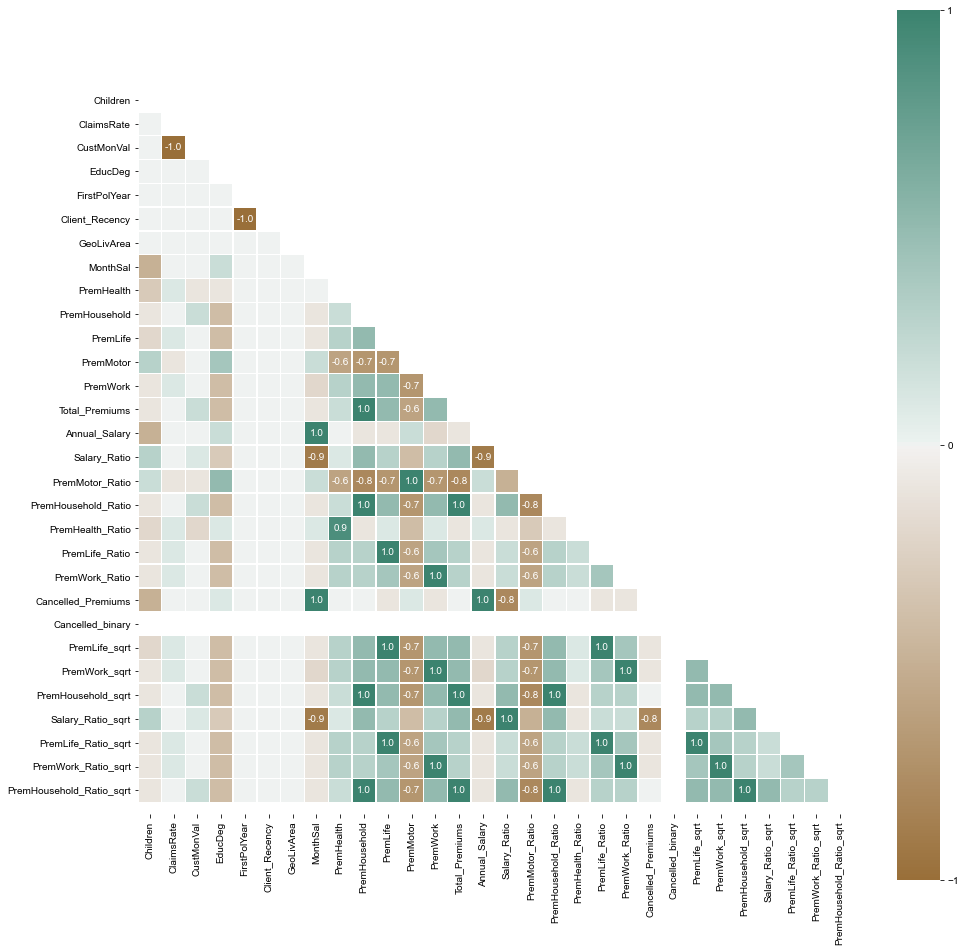

In [76]:
f, ax = plt.subplots(figsize = (16, 16))
mask = np.zeros_like(correlacoes, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

mask_annot = np.absolute(correlacoes.values) >= 0.6
annot1 = np.where(mask_annot, correlacoes.values, np.full((30,30),""))
cmap = sns.diverging_palette(49, 163, as_cmap = True)

sns.heatmap(correlacoes, mask=mask, cmap=cmap, center = 0, square = True, ax = ax, \
            linewidths = .5, annot = annot1, fmt = "s", vmin = -1, vmax = 1, cbar_kws= dict(ticks = [-1,0,1]))

sns.set(font_scale = 1.2)
sns.set_style('white')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
Próximos passos:
    - voltar a ver outliers nas novas variáveis
    - começar algos